In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [13]:
file_path = 'dataset/dataset.csv'
dataset = pd.read_csv(file_path)
dataset.head()

,date,jdate,high,low,open,close,volume
0,4/20/2020,1399-02-01,709012,691277,691277,708995,6775869348
1,4/21/2020,1399-02-02,726964,716060,716060,726137,6766131536
2,4/22/2020,1399-02-03,741952,729307,729307,741902,5832074074
3,4/25/2020,1399-02-06,770549,750464,750464,769373,3268853466
4,4/26/2020,1399-02-07,798105,780468,780468,797813,8728022060


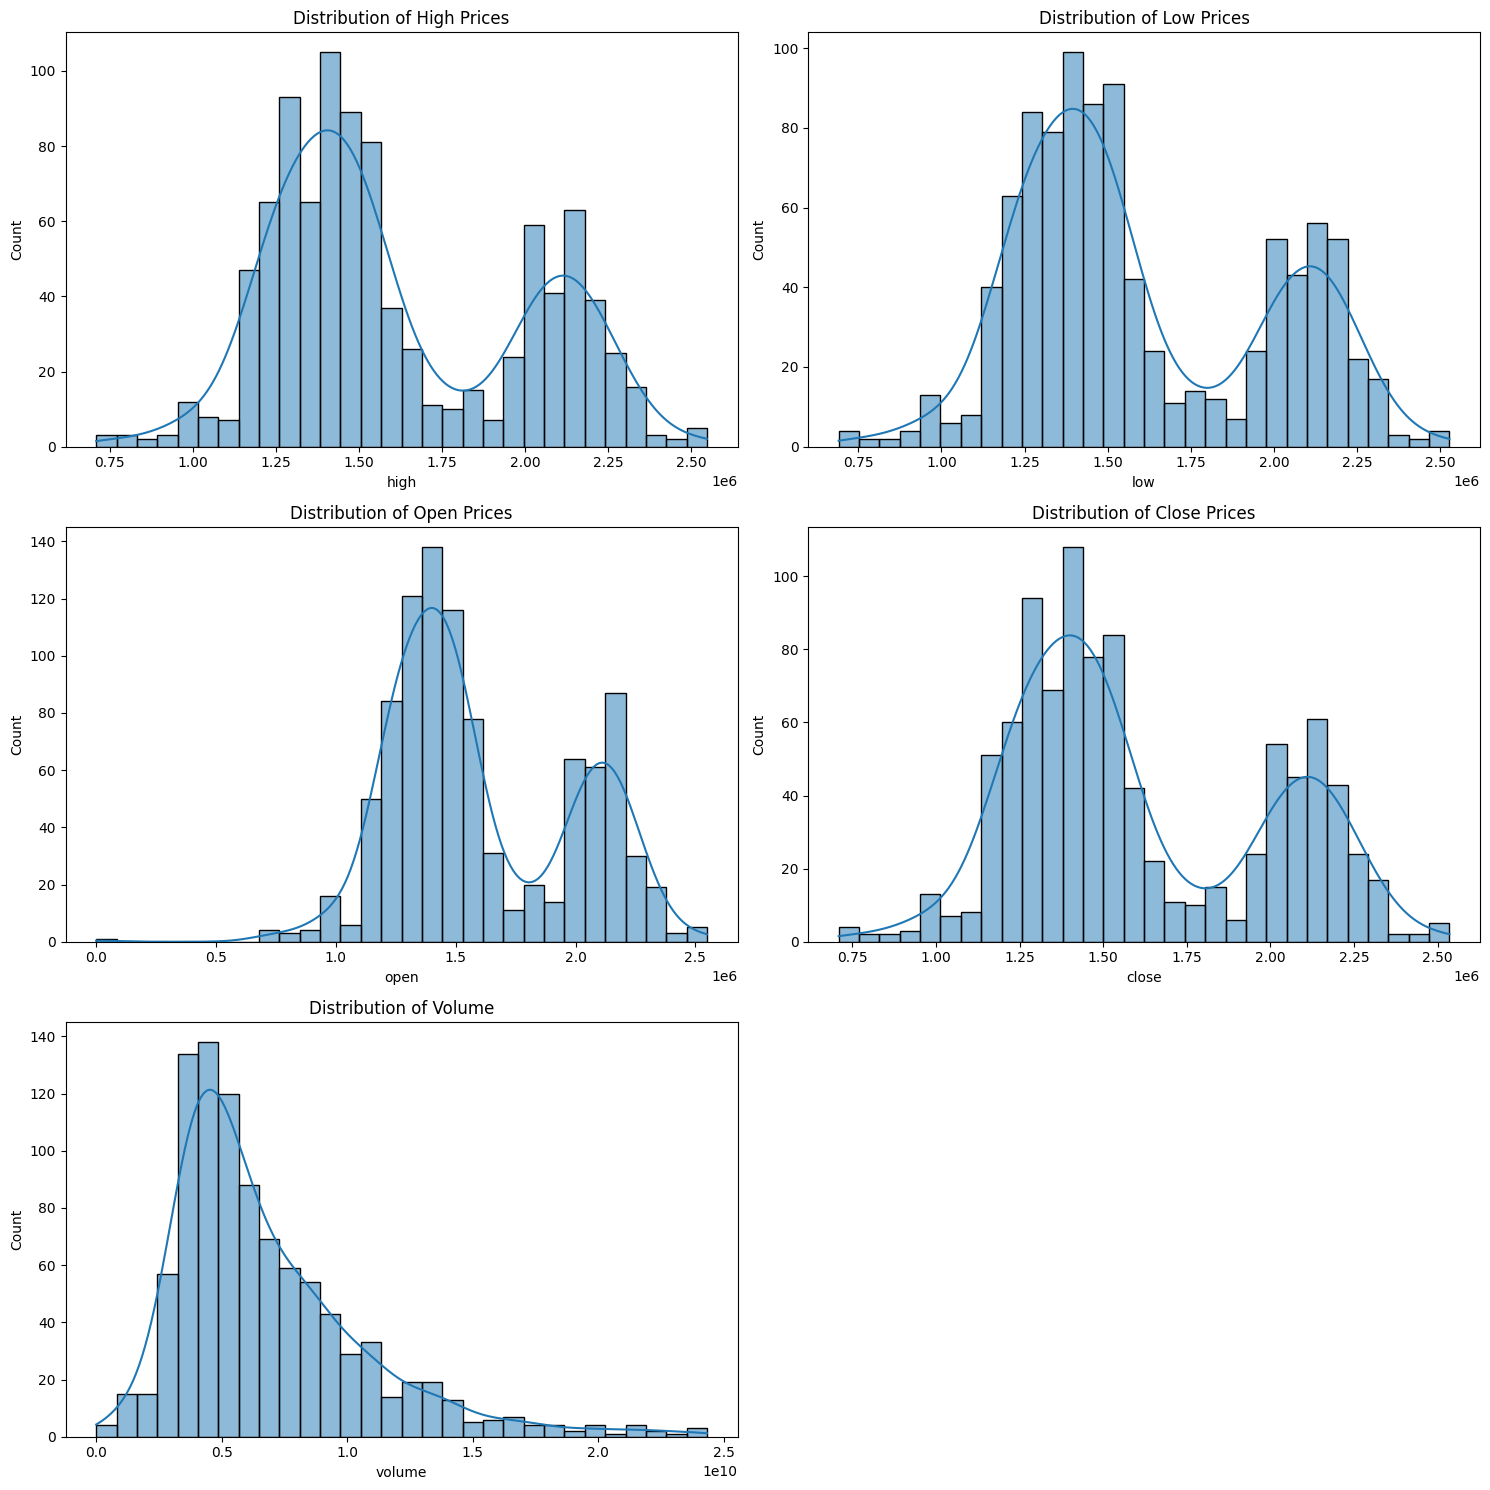

In [14]:
summary_statistics = dataset.describe()
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(dataset['high'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of High Prices')

sns.histplot(dataset['low'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Low Prices')

sns.histplot(dataset['open'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Open Prices')

sns.histplot(dataset['close'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Close Prices')

sns.histplot(dataset['volume'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Volume')

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


In [15]:

summary_statistics


,high,low,open,close,volume
count,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02,9.660000e+02
mean,1.611959e+06,1.596725e+06,1.602324e+06,1.604345e+06,6.794551e+09
std,3.774552e+05,3.755947e+05,3.802078e+05,3.763394e+05,3.844371e+09
min,7.090120e+05,6.912770e+05,0.000000e+00,7.089950e+05,0.000000e+00
25%,1.320205e+06,1.311330e+06,1.315568e+06,1.315344e+06,4.142413e+09
50%,1.490630e+06,1.477645e+06,1.487425e+06,1.486130e+06,5.668680e+09
75%,2.010722e+06,1.989638e+06,2.000378e+06,1.999621e+06,8.489369e+09
max,2.548220e+06,2.527540e+06,2.548220e+06,2.535236e+06,2.432164e+10


In [18]:
dataset['volume'] = np.log1p(dataset['volume'])
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(dataset[['high', 'low', 'open', 'close', 'volume']])
scaled_df = pd.DataFrame(scaled_columns, columns=['high', 'low', 'open', 'close', 'volume'])
min_max_scaler = MinMaxScaler()
scaled_columns_min_max = min_max_scaler.fit_transform(scaled_df[['high', 'low', 'open', 'close', 'volume']])
scaled_df_min_max = pd.DataFrame(scaled_columns_min_max, columns=['high', 'low', 'open', 'close', 'volume'])

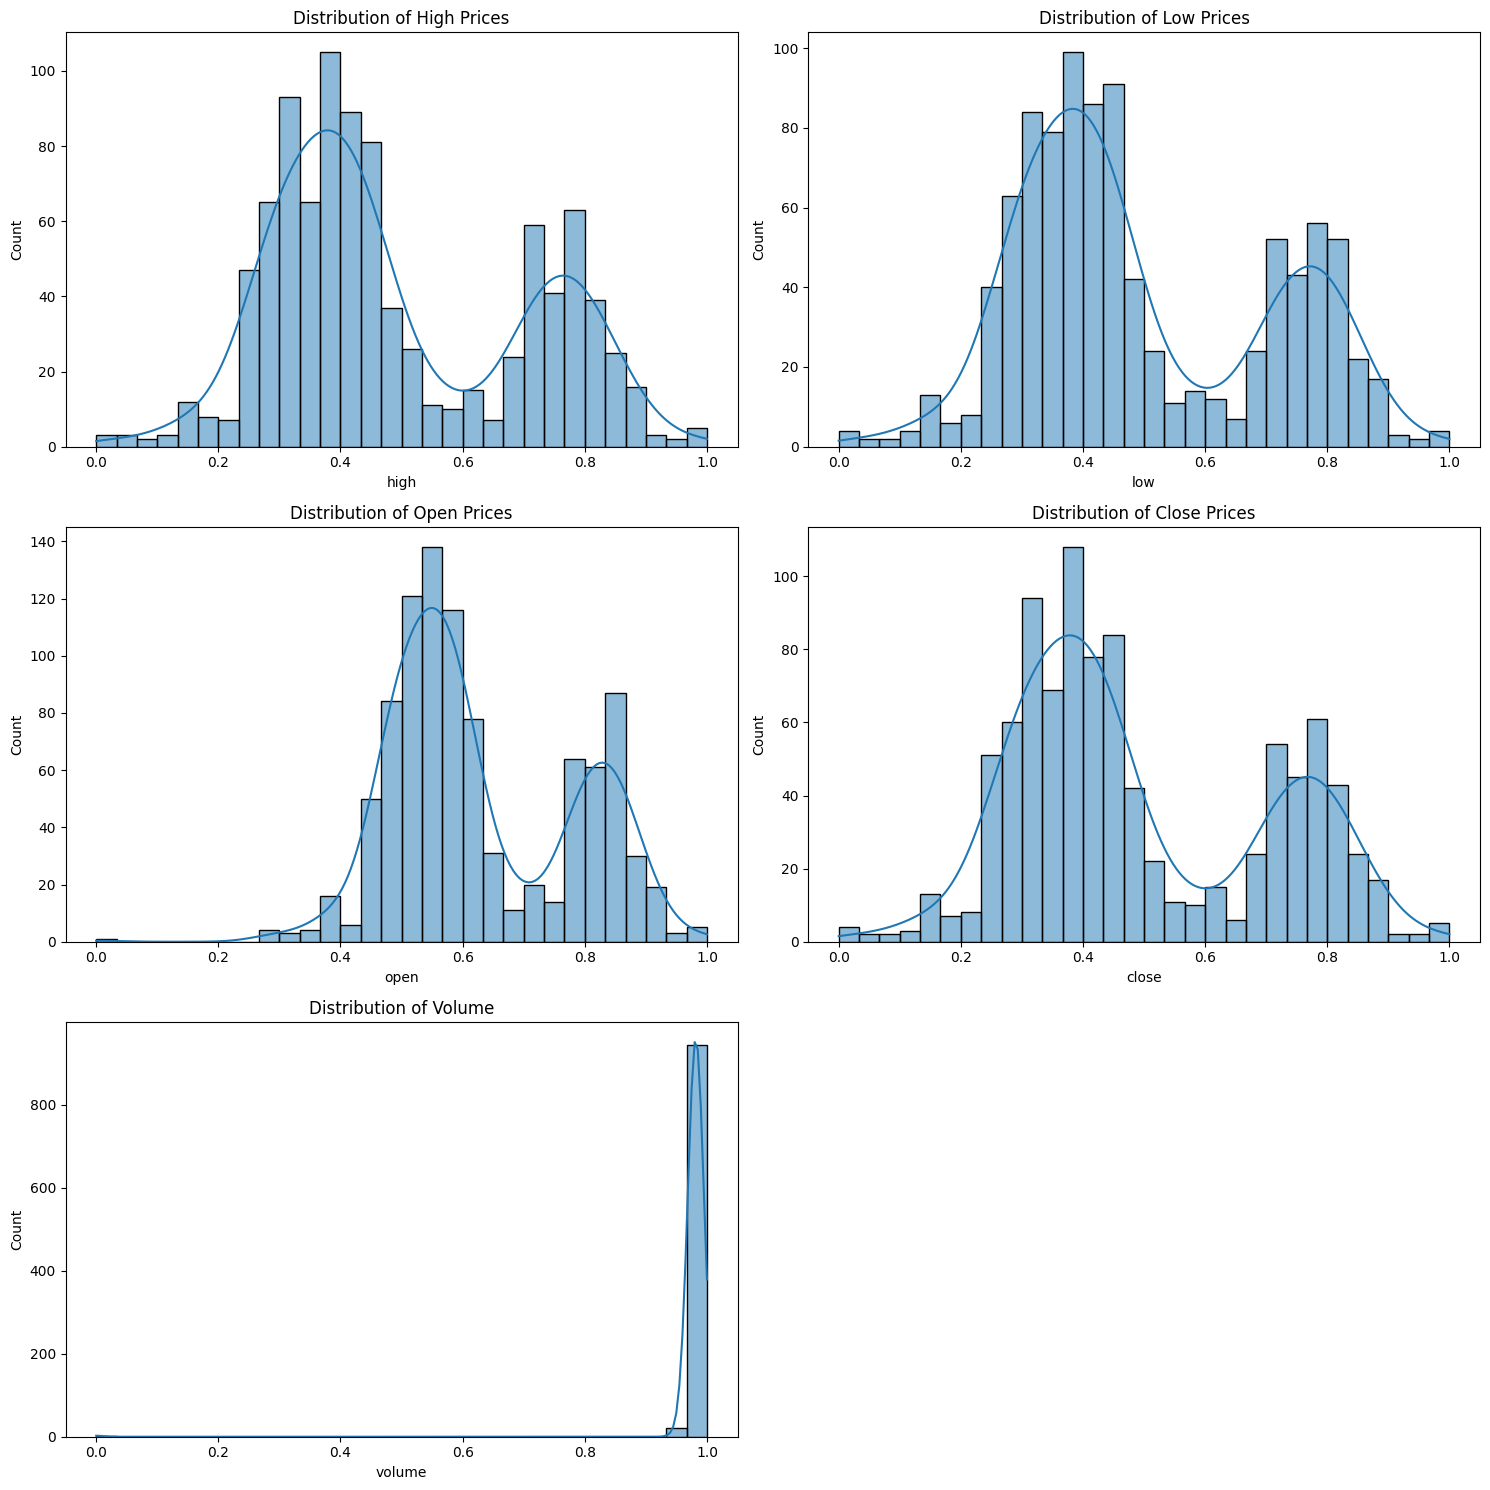

In [19]:
summary_statistics = dataset.describe()
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(scaled_df_min_max['high'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of High Prices')

sns.histplot(scaled_df_min_max['low'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Low Prices')

sns.histplot(scaled_df_min_max['open'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Open Prices')

sns.histplot(scaled_df_min_max['close'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Close Prices')

sns.histplot(scaled_df_min_max['volume'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Volume')

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()
